# Desafío Postulación Spike 5 Agosto: Francisco Born

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

pd.set_option("display.max_columns", 100)

## 1. Datos: Precipitaciones, Indicadores Económicos Banco Central

In [2]:
precipitations_raw = pd.read_csv('precipitaciones.csv')
economics_raw = pd.read_csv('banco_central.csv')

precipitations = precipitations_raw.copy()
economics = economics_raw.copy()

## 2. Análisis de datos. Creación de variables

### 2.1 Precipitaciones

In [3]:
precipitations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 496 non-null    object 
 1   Coquimbo                             496 non-null    float64
 2   Valparaiso                           496 non-null    float64
 3   Metropolitana_de_Santiago            496 non-null    float64
 4   Libertador_Gral__Bernardo_O_Higgins  496 non-null    float64
 5   Maule                                496 non-null    float64
 6   Biobio                               496 non-null    float64
 7   La_Araucania                         496 non-null    float64
 8   Los_Rios                             496 non-null    float64
dtypes: float64(8), object(1)
memory usage: 35.0+ KB


In [4]:
precipitations.head(3)

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098


In [5]:
precipitations['date'] = pd.to_datetime(precipitations['date'], format='%Y-%m-%d')
precipitations = precipitations.sort_values('date')
precipitations['date'].nunique()

496

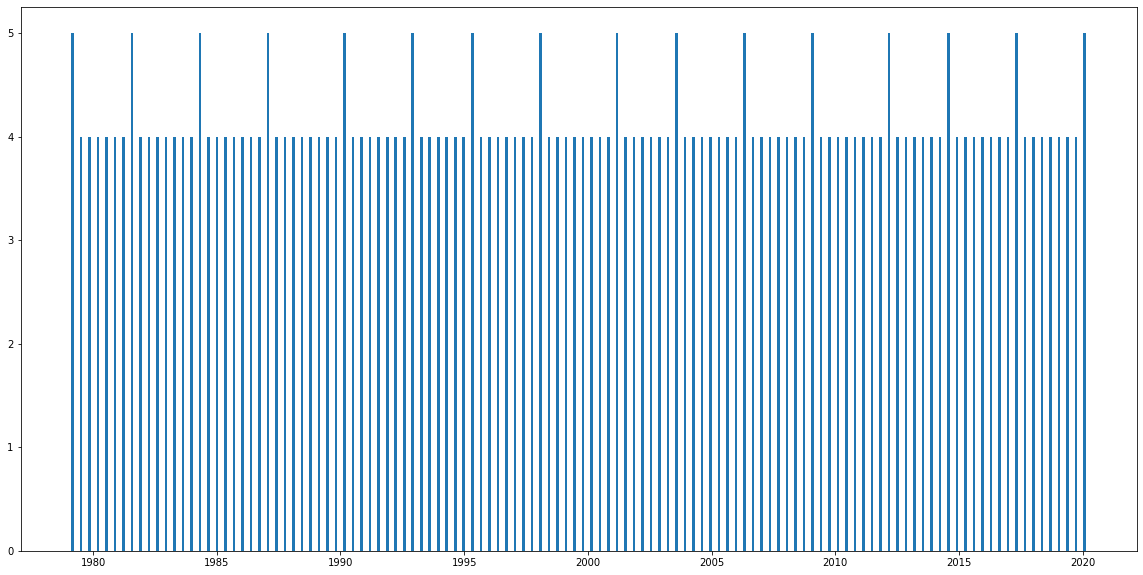

In [6]:
plt.figure(figsize=(20,10))
plt.hist(precipitations['date'], bins=3*40, rwidth=0.3)
plt.show()

In [7]:
precipitations.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


**Observaciones**: \
    - No hay datos faltantes en la tabla. \
    - Las fechas están distribuidas correctamente. \
    - No hay valores menores a 0. \
    - Los valores tienden a aumentar avanzando hacia el sur. \
    - Los valores de media y percentiles son comunes para los tiempos actuales. \
    - Los valores máximos son muy elevados para los tiempos actuales, en especial para la zona centro-norte.  
    Hay que comprobar en que año hubo precipitaciones con esos valores y si son correctos o valores anómalos. 
    Para ello, basta ver los gráficos de precipitaciones en función del tiempo en la pregunta 2.
    

### 2.2 Indicadores Económicos

In [8]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 85 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Periodo                                                                             614 non-null    object 
 1   Imacec_empalmado                                                                    300 non-null    object 
 2   Imacec_produccion_de_bienes                                                         300 non-null    object 
 3   Imacec_minero                                                                       300 non-null    object 
 4   Imacec_industria                                                                    301 non-null    object 
 5   Imacec_resto_de_bienes                                                              300 non-null   

In [9]:
low_info_cols = economics.columns[economics.apply(lambda col: col.notnull().sum() < 90)]
economics = economics.drop(low_info_cols, axis=1)

In [10]:
economics.head(3)

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,579.846.819,570.624.122,123.491.343,110.356.254,131.350.889,130.648.285,367.818.436,162.692.807,330.305.467,643.366.109,974.948.182,103.469.519,184.460.073,807.709.837,212.409.058,301.314.934,710.242.818,115.489.064,202.838.669,546.694.889,337.915.263,5.691.837,11.393.886,793.471.519,140.103.913,512.994.015,108.482.797,896.688.023,659.936.009,118.109.613,7.638.022,1593.60,288.157,347.586.864,301.11,3.8117,109.24,76.520.246,92.91,89.171,472.484,799.068.585,798.092.771,258.428.756,901.504.814,360.108.494,18.951.548,229.653.619,547.033.124,19.153.327,155.736.824,498.854.717,341.857.582,682.423.108,151.916.628,349.444.258,445.435.266,587.837.412,362.517.856,82.567.788,201.875.908,416.124.956,190.085.519,93.621,865.903.468,102.761.705,98.915.705,108.387.837,580.480.672,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,374.895.706,606.504.665,11.702.736,10.358.806,134.393.001,133.442.735,38.211.344,188.189.562,380.345.362,684.106.836,945.996.965,824.530.386,172.638.981,831.959.074,224.791.502,280.438.294,749.055.837,110.658.893,209.310.713,544.306.818,348.801.015,565.071.466,121.229.491,80.455.108,144.685.333,511.803.995,107.193.235,901.755.56

In [11]:
def try_change_date(date_str):
    try:
        date = pd.to_datetime(date_str, format='%Y-%m-%d')
    except Exception as e:
        print(e)
        date = pd.NaT
    return date

economics['Periodo'] = economics['Periodo'].map(lambda x: x.strip().split(' ')[0])
economics['Periodo'] = pd.DataFrame(economics['Periodo'].map(lambda x: try_change_date(x)))
economics['Periodo'].nunique()

time data 2020-13-01 doesn't match format specified


611

In [12]:
economics[economics['Periodo'].duplicated(keep=False)]

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Ventas_autos_nuevos
65,2018-08-01,109.690.834,994.693.267,101.027.633,1.051.861,931.900.957,106.248.833,117.404.143,109.458.386,110.578.221,167.218.756,618.107.584,127.494.583,114.044.798,135.911.049,134.337.385,352.713.059,155.499.282,282.857.251,761.910.666,10.666.085,113.232.043,205.964.209,753.121.123,229.592.623,341.668.896,771.082.628,110.815.907,240.435.294,648.893.077,417.627.795,686.888.472,120.587.594,945.484.562,17.263.425,585.841.147,11.510.209,104.105.171,515.511.264,12.603.131,53.532.204,1200.36,149.571,273.961.263,211.37,2.9677,73.13,5.319.667,67.99,97.452,656.250.909,870.719.435,641.968.676,216.799.913,918.492.209,423.859.029,216.848.578,293.308,827.010.405,163.289.707,166.817.299,589.477.133,452.211.964,742.884.096,164.123.096,388.556.009,470.714.131,788.049.995,489.831.763,113.514.038,27.638.401,359.984.869,144.446.086,102.822.273,911.086.301,102.691.109,983.228.221,105.596.535,654.060.172,38729.0
66,2018-08-01,109.690.834,994.693.267,101.027.633,1.051.861,931.900.957,106.248.833,117.404.143,109.458.386,110.578.221,167.218.756,618.107.584,127.494.583,114.044.798,135.911.049,134.337.385,352.713.059,155.499.282,282.857.251,761.910.666,10.666.085,113.232.043,205.964.209,753.121.123,229.592.623,341.668.896,771.082.628,110.815.907,240.435.294,648.893.077,417.627.795,686.888.472,120.587.594,945.484.562,17.263.425,585.841.147,11.510.209,104.105.171,515.511.264,12.603

In [13]:
economics = economics.drop_duplicates()
economics = economics.sort_values('Periodo')
economics['Periodo'].duplicated().sum()

0

In [14]:
idx_NaT = economics[economics['Periodo'].isna()].index.to_list()
economics.loc[idx_NaT]

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Ventas_autos_nuevos
89,NaT,NaN,NaN,NaN,NaN,NaN,803.222.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.754.323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.443.234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
economics = economics.drop(idx_NaT)
economics = economics.reset_index(drop= True)
economics.describe()

,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Ventas_autos_nuevos
count,611.000000,611.000000,170.000000,251.000000,251.000000,451.000000,155.000000,143.000000
mean,576.175565,53.853149,215.576176,5.075016,63.653147,42.984767,88.781923,26565.412587
std,466.602227,89.429346,68.971577,8.611861,29.816090,28.046418,36.798587,7128.420440
min,34.940000,1.320000,79.490000,1.612800,18.600000,11.300000,29.233000,4658.000000
25%,291.685000,4.755000,161.922500,2.873900,39.790000,20.050000,55.304000,23668.500000
50%,384.840000,6.060000,200.340000,3.890000,59.370000,30.300000,88.043000,27801.000000
75%,816.420000,32.575500,287.197500,5.955000,79.870000,59.605000,112.000000,31699.000000
max,1969.780000,431.028000,384.380000,136.338000,133.900000,133.930000,187.875000,39263.000000


In [16]:
def change_value_to_number(val):
    try:
        val = str(val).replace(".", "")
        val = val[0 : 1] + '.' + val[2 : ]
        val = float(val)
    except Exception as e:
        val = np.NaN
    return val
        
cols_to_fix_comma = economics.columns.to_list()
cols_to_fix_comma.remove('Periodo')
economics[cols_to_fix_comma] = economics[cols_to_fix_comma].applymap(change_value_to_number)

In [17]:
def get_probable_value_comma(referenced_val, val):
    # referenced_val is an indicator value with a comma position
    # val is the indicator value with no comma position and is from a period before of referenced_val
    referenced_val = float(referenced_val)
    val = str(val).replace(".", "")
    comma_pos = str(referenced_val).find('.')
    val_comma_pos = float(val[0 : comma_pos] + '.' + val[comma_pos : ])
    val_after_comma_pos = float(val[0 : comma_pos+1] + '.' + val[comma_pos+1 : ])
    val_before_comma_pos = float(val[0 : comma_pos-1] + '.' + val[comma_pos-1 : ])
    dif_val_comma_pos = abs(val_comma_pos - referenced_val)
    dif_val_after_comma_pos = abs(val_after_comma_pos - referenced_val)
    dif_val_before_comma_pos = abs(val_before_comma_pos - referenced_val)

    prob_val = val_comma_pos
    prob_dif = dif_val_comma_pos
    if dif_val_after_comma_pos < prob_dif:
        prob_val = val_after_comma_pos
        prob_dif = dif_val_after_comma_pos
    if dif_val_before_comma_pos < prob_dif:
        prob_val = val_before_comma_pos
        prob_dif = dif_val_before_comma_pos
    return float(prob_val)

In [18]:
cols_to_fix_comma = economics.columns.to_list()
cols_to_fix_comma.remove('Periodo')

In [19]:
array = economics[cols_to_fix_comma].values
n_rows, n_cols = array.shape
for j in range(n_cols):
    i = n_rows - 1
    last_val_known = array[i, j]
    while np.isnan(last_val_known):
        i = i - 1
        if i < 0: 
            break
        last_val_known = array[i, j]
    if np.isnan(last_val_known): 
        continue
    while i >= 0:
        next_val = array[i-1, j]
        while np.isnan(next_val):
            i = i - 1
            if i < 0: 
                break
            next_val = array[i-1, j]
        if np.isnan(next_val):
            break
        array[i-1,j] = get_probable_value_comma(last_val_known, next_val)
        last_val_known = array[i-1,j]
        i = i - 1


temp = pd.DataFrame(array, columns= cols_to_fix_comma).astype('float')
economics[cols_to_fix_comma] = temp[cols_to_fix_comma]
economics.describe()

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Ventas_autos_nuevos
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,592.000000,611.000000,611.00000,611.000000,170.000000,251.000000,251.000000,251.000000,451.000000,155.000000,460.000000,128.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,311.000000,418.000000,142.000000,370.000000,358.000000,262.000000,143.000000
mean,0.891609,0.928353,0.954311,0.914809,3.299371,0.798033,0.849690,0.900576,0.872573,0.889474,6.606459,0.794683,0.306776,1.486902,0.498346,3.429225,1.072823,2.903153,6.870754,1.165846,2.595927,0.872476,7.116047,1.996852,3.312688,1.302278,1.340780,0.347598,5.928776,4.032554,6.503236,0.373670,9.020864,1.191750,5.654403,1.468230,0.926453,2.822619,1.448157,0.589526,0.468782,0.88866,1.257146,0.332328,0.495267,3.987920,0.508265,0.466185,5.523619,4.647521,8.167618,6.816526,0.311030,9.056167,4.358863,1.742947,2.679611,7.435844,1.521614,1.462230,5.407616,3.745895,7.1

In [20]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 80 columns):
 #   Column                                                                              Non-Null Count  Dtype         
---  ------                                                                              --------------  -----         
 0   Periodo                                                                             611 non-null    datetime64[ns]
 1   Imacec_empalmado                                                                    298 non-null    float64       
 2   Imacec_produccion_de_bienes                                                         298 non-null    float64       
 3   Imacec_minero                                                                       298 non-null    float64       
 4   Imacec_industria                                                                    298 non-null    float64       
 5   Imacec_resto_de_bienes                            

**Observaciones**: \
    - Falta una gran cantidad de datos, muchas columnas con más de 80% de los datos faltantes. \
    - Había valores incorrectos como 'a' en columnas que debiesen ser de valores numéricos. \
    - La mayoría de los valores numéricos tenían varios puntos y en distintos lugares, lo que permite asumir que hubo un error en el manejo de la base de datos y se perdieron las posiciones de las comas. Esto no permite ver los valores reales de los indicadores económicos. \
    - Para la mayoría de los modelos utilizados en la predicción de datos, se deben normalizar los datos. Por este motivo no importa tanto el valor real de los indicadores pero sí que todos estén en la misma escala. Una opción en este caso hubiese sido buscar la data real con menos errores (la cuál se puede descargar de "si3.bcentral.cl"). Otra opción (cuando no se pueden corroborar de forma sencilla los datos) es intentar colocar la coma en el lugar correcto. La última opción mencionada es lo que se hizo en este desafío.
    

## 3. Visualización

In [21]:
def plot_precipitations_given_dates(df, region, start_date, end_date):
    try:
        start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
        end_date = pd.to_datetime(end_date, format='%Y-%m-%d')
    except:
        print("Error: Could not identify given dates")
        return
    if region not in df.columns:
        print("Error: No available data for the region:", region)
        return
    if pd.DataFrame(df['date'] == start_date).sum()[0] < 1:
        print("Error: start date data is not available")
        return
    if pd.DataFrame(df['date'] == end_date).sum()[0] < 1:
        print("Error: end date data is not available")
        return
    temp = df.sort_values('date').set_index('date')
    temp = temp.loc[(temp.index >= start_date) &  (temp.index <= end_date)]

    plt.figure(figsize=(15,8))
    plt.xticks(rotation=45)
    plt.ylabel("Average monthly precipitation [mm]", fontsize=15)
    plt.plot(temp[region], label= region)
    plt.legend(fontsize=15)
    plt.show()
    return

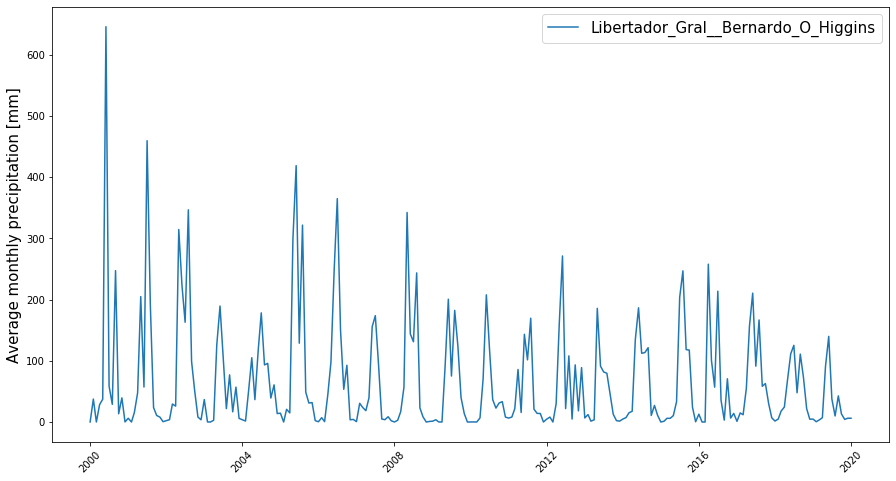

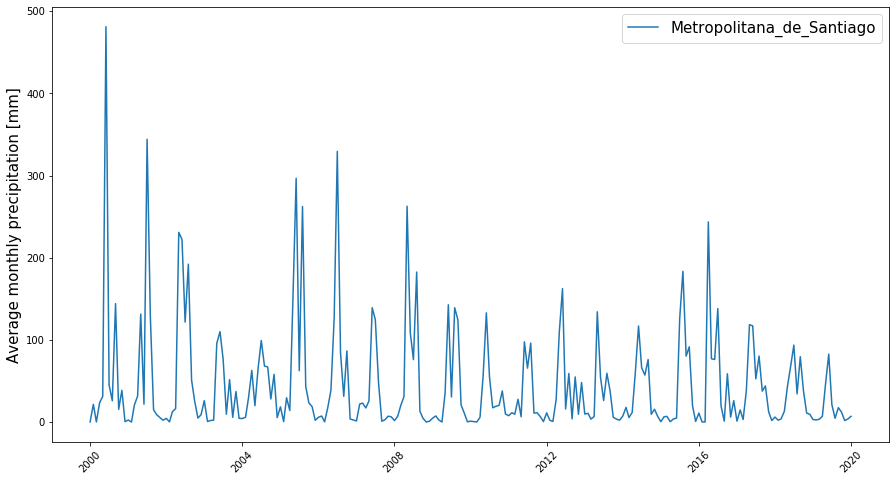

In [22]:
plot_precipitations_given_dates(precipitations, 'Libertador_Gral__Bernardo_O_Higgins', "2000-01-01", "2020-01-01")
plot_precipitations_given_dates(precipitations, 'Metropolitana_de_Santiago', "2000-01-01", "2020-01-01")

**Observaciones**: \
    - Como es de esperar para Chile, a comienzo y fin de año (verano) hay pocas precipitaciones; y son máximas a mitad de año. \
    - Los máximos de las precipitaciones van disminuyendo con el avance de los años. Esto era esperable por el calentamiento global.

In [23]:
def plot_precipitations_series(df, region, years):
    plt.figure(figsize=(15,8))
    for year in years:
        temp = df.sort_values('date').set_index('date')
        temp = temp.loc[temp.index.year == year ]
        temp = temp.set_index(temp.index.strftime("%B"))
        plt.plot(temp[region], label= region + ", year " +str(year))
    plt.xticks(rotation=45, fontsize=15)
    plt.ylabel("Average monthly precipitation [mm]", fontsize=15)
    plt.legend(fontsize=15)
    plt.show()

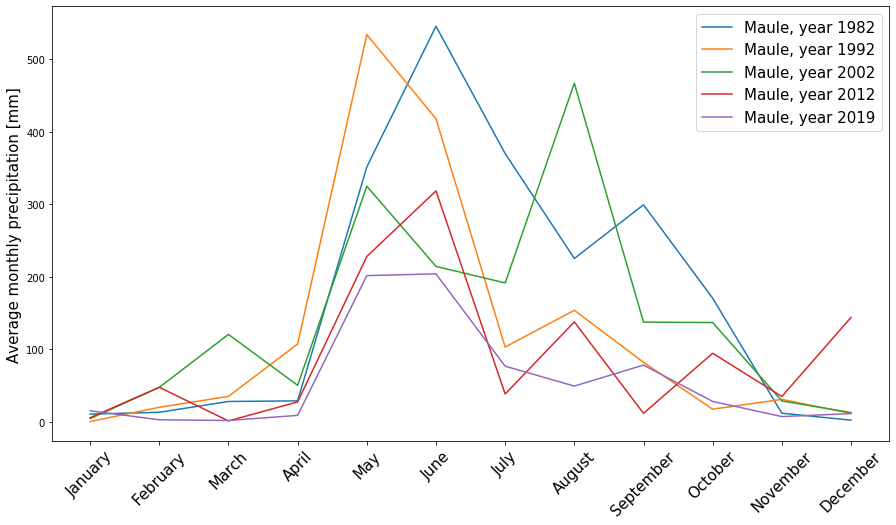

In [24]:
plot_precipitations_series(precipitations, 'Maule', [1982, 1992, 2002, 2012, 2019])

**Observaciones**: \
    - Se observa con mayor claridad la tendencia a las sequías o menos precipitaciones al avanzar los años. \
    - Se observa con mayor claridad la estacionalidad donde las precipitaciones se concentran a mitad de año y son bajas en verano. Como las fechas son el primer día de cada mes, el punto de Mayo en el gráfico corresponde a las lluvias del mes de Abril. Con esto se puede ver que las mayores precipitaciones corresponden entre Abril y Junio, lo que nos dice que en la región del Maule, la mayoría de las lluvias ocurren en Otoño. En invierno también llueve pero en menor cantidad.
    

In [25]:
def plot_PIB_series_given_dates(df, PIB_1, PIB_2, start_date, end_date):
    try:
        start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
        end_date = pd.to_datetime(end_date, format='%Y-%m-%d')
    except:
        print("Error: Could not identify given dates")
        return
    if PIB_1 not in df.columns:
        print("Error: No available data for the PIB:", PIB_1)
        return
    if PIB_2 not in df.columns:
        print("Error: No available data for the PIB:", PIB_2)
        return
    if pd.DataFrame(df['Periodo'] == start_date).sum()[0] < 1:
        print("Error: start date data is not available")
        return
    if pd.DataFrame(df['Periodo'] == end_date).sum()[0] < 1:
        print("Error: end date data is not available")
        return
    
    temp = df.sort_values('Periodo').set_index('Periodo')
    temp = temp.loc[(temp.index >= start_date) &  (temp.index <= end_date)]

    plt.figure(figsize=(15,8))
    plt.plot(temp[PIB_1], label= PIB_1)
    plt.plot(temp[PIB_2], label= PIB_2)
    
    plt.xticks(rotation=45)
    plt.legend(fontsize=15)
    plt.show()
    return

In [26]:
temp = economics['PIB_Agropecuario_silvicola'].notnull()
temp = temp[temp == True]
last_date_PIB_Agropecuario_silvicola = economics['Periodo'][temp.index[-1]]

temp = economics['PIB_Servicios_financieros'].notnull()
temp = temp[temp == True]
last_date_PIB_Servicios_financieros = economics['Periodo'][temp.index[-1]]

last_date = last_date_PIB_Agropecuario_silvicola
if last_date_PIB_Servicios_financieros > last_date:
    last_date = last_date_PIB_Servicios_financieros
last_date_str = last_date.strftime('%Y-%m-%d')
last_date_str

'2020-09-01'

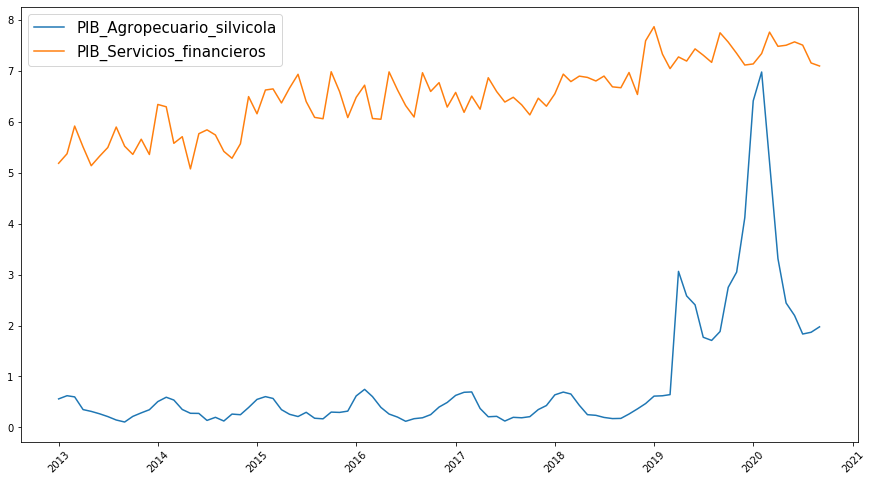

In [27]:
plot_PIB_series_given_dates(economics, "PIB_Agropecuario_silvicola", "PIB_Servicios_financieros", "2013-01-01", last_date_str)

In [28]:
# Las comas no parecieran ser correctas para PIB_Agropecuario_silvicola y segun los datos reales, ambos PIB
# debiesen estar en la misma magnitud, por lo que se hace el arreglo correspondiente.
temp = economics['PIB_Agropecuario_silvicola'].notnull()
temp = temp[temp == True]
start_date_PIB_Agropecuario_silvicola = economics['Periodo'][temp.index[0]]
start_date_PIB_Agropecuario_silvicola

Timestamp('2013-01-01 00:00:00')

In [29]:
economics['PIB_Agropecuario_silvicola'] = economics['PIB_Agropecuario_silvicola'].apply(lambda x: x/10 if x>1.5 else x)
economics['PIB_Servicios_financieros'] = economics['PIB_Servicios_financieros']/10

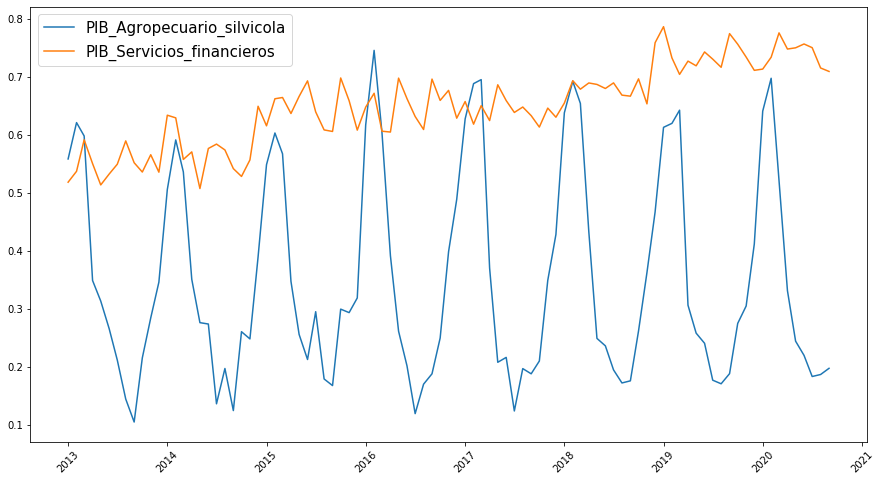

In [30]:
plot_PIB_series_given_dates(economics, "PIB_Agropecuario_silvicola", "PIB_Servicios_financieros", "2013-01-01", last_date_str)

**Observaciones**: \
    - Se observa que la tendencia del PIB de servicios financieros es al alza con los años. No se puede ver una estacionalidad de forma directa. Sus valores son relativamente estables sin cambios bruscos. \
    - La tendencia del PIB del sector agropecuario silvícola es leve pero va al alza con los años. Se observa una estacionalidad notoria donde el PIB tiene valores máximos en verano y valores mínimos a mitad de año. \
    - A simple vista no se observa una relación importante entre ambas series. Lo único que se observa es que el PIB de servicios financieros es en promedio más alto que el PIB del sector agropecuario silvícola y con los años la diferencia se hace mayor.

## 4. Tratamiento y creación de variables

### 4.1 Correlación

Para ver la correlación entre variables en un jupyter notebook de manera sencilla, se puede utilizar DataFrame.corr().style.background_gradient \
La correlación entre variables genera un problema de multicolinealidad. No permite ver la dependencia de los resultados a las variables al cambiarlas una a la vez, esto genera un peor rendimiento en la mayoría de los algoritmos de machine learning.


In [31]:
corr = economics.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

### 4.2 Merge de bases de datos

In [32]:
precio_leche_raw = pd.read_csv('precio_leche.csv')
precio_leche = precio_leche_raw.copy()

In [33]:
precio_leche.head(3)

,Anio,Mes,Precio_leche
0,1979,Ene,3.85
1,1979,Feb,4.58
2,1979,Mar,5.18


In [34]:
precio_leche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Anio          506 non-null    int64  
 1   Mes           506 non-null    object 
 2   Precio_leche  506 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.0+ KB


In [35]:
precio_leche['Mes'].unique()

array(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep',
       'Oct', 'Nov', 'Dic'], dtype=object)

In [36]:
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
precipitations['fecha'] = precipitations['date']
economics['fecha'] = economics['Periodo']
precio_leche['Mes'] = precio_leche['Mes'].apply(lambda x: meses.index(x)+1)
precio_leche['fecha'] = precio_leche['Mes'].astype('str') + "-" + precio_leche['Anio'].astype('str')
precio_leche['fecha'] = pd.to_datetime(precio_leche['fecha'], format='%m-%Y')

In [37]:
precio_leche = precio_leche.set_index('fecha')
precipitations = precipitations.set_index('fecha')
economics = economics.set_index('fecha')

In [38]:
complete_db = precipitations.join(economics)
complete_db = complete_db.join(precio_leche)
complete_db = complete_db.drop(['date', 'Periodo'], axis=1)
complete_db = complete_db.sort_index()

### 4.3 Creación variables

In [39]:
complete_db['Precio_leche_futuro'] = complete_db['Precio_leche'].shift(-1, freq='MS')
complete_db = complete_db.drop(['Precio_leche'], axis=1)
complete_db['Anio'] = complete_db.index.year
complete_db['Mes'] = complete_db.index.month
complete_db['Trimestre'] = (complete_db.index.month-1)//3 + 1

In [40]:
cols_get_accumulated = precipitations_raw.columns.to_list()
cols_get_accumulated.remove('date')
cols_get_accumulated

['Coquimbo',
 'Valparaiso',
 'Metropolitana_de_Santiago',
 'Libertador_Gral__Bernardo_O_Higgins',
 'Maule',
 'Biobio',
 'La_Araucania',
 'Los_Rios']

In [41]:
temp = complete_db[cols_get_accumulated]
temp_shift_1 = temp.shift(1, freq='MS')
temp_shift_2 = temp.shift(2, freq='MS')
temp_shift_3 = temp.shift(3, freq='MS')
df_accumulated = temp + temp_shift_1 + temp_shift_2 + temp_shift_3
df_accumulated = df_accumulated.add_prefix('acc_4_month_')
df_accumulated = df_accumulated.loc[temp.index]
complete_db = complete_db.join(df_accumulated)
complete_db['Promedio_precipitaciones'] = complete_db[cols_get_accumulated].mean(axis=1)
complete_db.tail(3)

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Ventas_autos_nuevos,Anio,Mes,Precio_leche_futuro,Trimestre,acc_4_month_Coquimbo,acc_4_month_Valparaiso,acc_4_month_Metropolitana_de_Santiago,acc_4_month_Libertador_Gral__Bernardo_O_Higgins,acc_4_month_Maule,acc_4_month_Biobio,acc_4_month_La_Araucania,acc_4_month_Los_Rios,Promedio_precipitaciones
fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-01,0.179216,0.003701,0.032064,0.017628,0.200483,10.108504,29.001988,55.838889,1.698212,1.906691,0.901728,1.100536,14.713152,1.999370,1.296202,1.693438,1.802140,0.697999,6.511365,1.243361,1.025774,1.261002,1.899799,3.149862,1.381625,2.412006,6.149558,0.974171,16.464220,1.770357,6.672885,2.928955,3.946639,7.378635,1.515159,0.295073,6.946330,4.491899,0.734293,1.853218,9.947411,0.887204,6.031327,1.244795,1.006932,4.290826,1.291908,0.404215,1.9563,1.8426,2.793568,1.542,1.158,5.00,0.318747,0.553,3.638,7.637950,9.633737,7.695676,0.240390,8.665388,4.776422,2.002460,3.761882,8.094448,1.156818,1.518647,5.365709,4.221473,7.270842,1.086094,6.952719,5.177577,7.175753,5.178666,18.940376,2.195290,3.111826,0.269493,1.738050,1.489935,0.933464,0.942392,1.135689,6.682,2.025,2020,2,279.88,1,3.778497,2.203604,12.381325,16.677845,26.580857,71.309009,158.785590,314.670414,11.922809
2020-03-

## 5 Modelo predictivo

In [42]:
pd.DataFrame(complete_db.isnull().sum()).T

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Ventas_autos_nuevos,Anio,Mes,Precio_leche_futuro,Trimestre,acc_4_month_Coquimbo,acc_4_month_Valparaiso,acc_4_month_Metropolitana_de_Santiago,acc_4_month_Libertador_Gral__Bernardo_O_Higgins,acc_4_month_Maule,acc_4_month_Biobio,acc_4_month_La_Araucania,acc_4_month_Los_Rios,Promedio_precipitaciones
0,0,0,0,0,0,0,0,0,204,204,204,204,204,204,204,204,204,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,0,0,0,0,333,252,252,252,52,348,43,374,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,192,84,360,132,144,240,360,0,0,1,0,3,3,3,3,3,3,3,3,0


In [43]:
from sklearn.impute import SimpleImputer

n_cols = complete_db.shape[1]
complete_db = complete_db[complete_db.isnull().sum(axis=1) < 0.6*n_cols]
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
complete_db = pd.DataFrame(imp_mean.fit_transform(complete_db), columns=complete_db.columns, index=complete_db.index)
complete_db.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 1999-01-01 to 2020-04-01
Data columns (total 100 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Coquimbo                                                                            256 non-null    float64
 1   Valparaiso                                                                          256 non-null    float64
 2   Metropolitana_de_Santiago                                                           256 non-null    float64
 3   Libertador_Gral__Bernardo_O_Higgins                                                 256 non-null    float64
 4   Maule                                                                               256 non-null    float64
 5   Biobio                                                                         

In [44]:
complete_db = complete_db[complete_db['Precio_leche_futuro'].notnull()]
x_data = complete_db.drop(['Precio_leche_futuro'], axis=1)
y_data = complete_db['Precio_leche_futuro']

Como son pocos datos, es preferible utilizar validación cruzada en vez de apartar datos para un conjunto aparte. Se utilizará una distribución 80/20 de entrenamiento/validación que son valores típicos para esta validación.

In [45]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)
pca = PCA(n_components=0.99)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)
corr = pd.DataFrame(x_train).corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import svm

kf = KFold(n_splits=5)
classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

score_list = []
preds_list = []
for item in classifiers:
    print(item)
    clf = item
    clf.fit(x_train, y_train)
    preds = clf.predict(x_test)
    scores = cross_val_score(clf, x_train, y_train, cv=kf)
    print("Media de cross_validation:", scores.mean(), '\n')
    score_list.append(scores.mean())
    preds_list.append(preds)
    
best_score = np.max(score_list)
best_model = classifiers[score_list.index(best_score)]
best_result = preds_list[score_list.index(best_score)]

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Media de cross_validation: 0.22943851473027488 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
Media de cross_validation: 0.28995161898997646 

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
Media de cross_validation: 0.858406742865346 

LassoLars(alpha=1.0, copy_X=True, eps=2.220446

In [48]:
results = pd.DataFrame(data={"precio_estimado": best_result, "precio_real": y_test.values})
results['relative_dif [%]'] = 100*abs(results['precio_estimado'] - results['precio_real'])/results['precio_real']
metric_mean = results['relative_dif [%]'].mean()
metric_max = results['relative_dif [%]'].max()
print("----------------------------------------------------")
print('Mejor resultado obtenido utilizando ', best_model)
print('Error medio porcentual: ', metric_mean)
print('Error maximo porcentual: ', metric_max)
print('Raiz error cuadratico medio: ', mean_squared_error(best_result, y_test.values, squared=False))

----------------------------------------------------
Mejor resultado obtenido utilizando  BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
Error medio porcentual:  8.626069011959721
Error maximo porcentual:  38.2092079993066
Raiz error cuadratico medio:  18.304471768222978


In [49]:
results

,precio_estimado,precio_real,relative_dif [%]
0,192.371040,213.02,9.693437
1,194.492613,199.43,2.475750
2,113.864224,112.94,0.818332
3,228.122357,198.99,14.640111
4,131.867203,116.05,13.629645
5,190.188151,204.99,7.220767
6,158.373931,114.59,38.209208
7,175.838905,200.63,12.356624
8,190.637589,167.01,14.147410
9,235.277411,243.44,3.353019


**Observaciones**: \
Los datos que se tienen reflejan una idea general de lo ocurrido en el país, por lo que se debiese tener un buen resultado con ellos. Se puede mejorar el modelo con lo siguiente: \
    - Que los datos se encuentren con sus valores y formatos correctos, ya que con el manejo de las comas que se realizó se debió perder mucha información. \
    - Que no hayan tantos datos faltantes, ya que se tuvieron que rellenar con valores que no son los reales y eso disminuye la capacidad del modelo para predecir. Se podrían haber rellenado de mejor manera pero aún así no es lo mismo que tener los valores reales. \
    - Para un problema de regresión, se puede evaluar el modelo comparando las salidas reales con las predichas con als siguientes métricas: la raíz del error cuadrático medio, errores relativos (el promedio, el máximo, media, el tercer cuartil), errores absolutos, etc. \
    - Este tipo de problemas corresponde a modelos de regresión que buscan estimar un valor continuo de variables. Distintos usos: en retail puede ayudar a predecir el stock necesario de los productos en bodegas, en marketing se puede predecir momentos donde promocionar productos tiene mejor impacto, predecir valores de compra y venta de bienes (casas, autos, acciones), etc. \
    - Con variables de producción a nivel global y variables obtenidas por sensores, se podría predecir las precipitaciones en distintos lugares y adecuar el consumo de agua a ello. Predecir las lluvias en función del número de industrias por región entre otras características, permitiría ver un número máximo de industrias por sector. Así mismo se podría estimar el aumento de temperatura según distintos indicadores y evitar aquellos que generen mayor impacto. \
    - Aún con los problemas en la base de datos, las predicciones tienen un error promedio bajo el 10%, que es bastante bueno.